In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
csv_data = "../ETL/sf_df_final.csv"
sf_df = pd.read_csv(csv_data)

In [3]:
cols = ["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs",\
       "furnished", "rent"]
sf_df = sf_df[cols].copy()
sf_df

,neighborhood,br,ba,sqft,housingType,laundry,parking,cats,dogs,furnished,rent
0,Sunset / Parkside,4,2.0,1600.0,apartment,laundry on site,street parking,no,no,no,4200
1,Lower Pac Hts,0,1.0,NaN,apartment,laundry in bldg,attached garage,no,no,no,2850
2,SOMA / South Beach,1,1.0,598.0,apartment,w/d in unit,detached garage,yes,yes,no,3431
3,Lower Pac Hts,1,1.0,915.0,apartment,w/d in unit,attached garage,no,no,no,3795
4,Ingleside / SFSU / CCSF,1,1.0,NaN,apartment,no laundry on site,street parking,no,no,no,2000
...,...,...,...,...,...,...,...,...,...,...,...
2591,North Beach / Telegraph Hill,1,1.0,NaN,apartment,laundry in bldg,attached garage,no,no,no,2495
2592,Nob Hill,1,1.0,NaN,apartment,laundry in bldg,street parking,no,no,no,2395
2593,Mission District,1,1.0,NaN,apartment,no laundry on site,street parking,no,no,no,2350
2594,Russian Hill,0,1.0,NaN,apartment,laundry in bldg,street parking,no,no,no,1995


In [4]:
sf_df.describe()

,br,ba,sqft,rent
count,2596.000000,2596.000000,1227.000000,2596.000000
mean,1.417951,1.211287,852.565607,3007.330123
std,1.095361,0.444560,405.451684,1187.119637
min,0.000000,1.000000,8.000000,650.000000
25%,1.000000,1.000000,566.000000,2190.000000
50%,1.000000,1.000000,775.000000,2795.000000
75%,2.000000,1.000000,1089.000000,3688.500000
max,8.000000,4.000000,3700.000000,7995.000000


In [5]:
# replace Nan values in sf_df['sqft']
sf_df['sqft'] = sf_df['sqft'].apply(str)
sf_df.loc[sf_df['sqft'].str.contains('nan'), 'sqft'] = "0"
sf_df['sqft'] = pd.to_numeric(sf_df['sqft'])

sf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  2596 non-null   object 
 1   br            2596 non-null   int64  
 2   ba            2596 non-null   float64
 3   sqft          2596 non-null   float64
 4   housingType   2596 non-null   object 
 5   laundry       2596 non-null   object 
 6   parking       2596 non-null   object 
 7   cats          2596 non-null   object 
 8   dogs          2596 non-null   object 
 9   furnished     2596 non-null   object 
 10  rent          2596 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 223.2+ KB


In [6]:
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  2596 non-null   object 
 1   br            2596 non-null   int64  
 2   ba            2596 non-null   float64
 3   sqft          2596 non-null   float64
 4   housingType   2596 non-null   object 
 5   laundry       2596 non-null   object 
 6   parking       2596 non-null   object 
 7   cats          2596 non-null   object 
 8   dogs          2596 non-null   object 
 9   furnished     2596 non-null   object 
 10  rent          2596 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 223.2+ KB


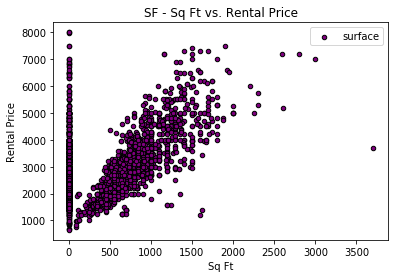

In [7]:
plt.figure()
plt.scatter(sf_df['sqft'],sf_df['rent'], s=20, edgecolor="black",c="purple", label="surface")
plt.xlabel("Sq Ft")
plt.ylabel("Rental Price")
plt.title("SF - Sq Ft vs. Rental Price")
plt.legend()
plt.show()

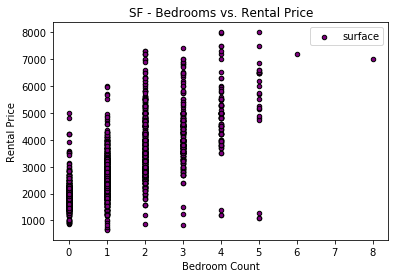

In [8]:
plt.figure()
plt.scatter(sf_df['br'],sf_df['rent'], s=20, edgecolor="black",c="purple", label="surface")
plt.xlabel("Bedroom Count")
plt.ylabel("Rental Price")
plt.title("SF - Bedrooms vs. Rental Price")
plt.legend()
plt.show()

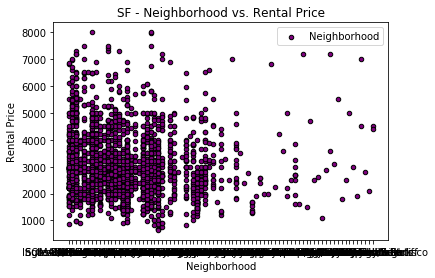

In [9]:
plt.figure()
plt.scatter(sf_df['neighborhood'],sf_df['rent'], s=20, edgecolor="black",c="purple", label="Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Rental Price")
plt.title("SF - Neighborhood vs. Rental Price")
plt.legend()
plt.show()

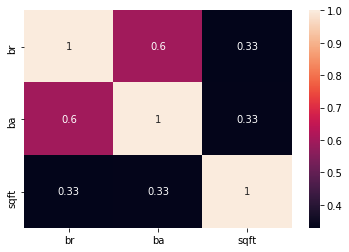

In [10]:
import seaborn as sn
## keep only numerical columns
X = (sf_df[["br", "ba", "sqft", "laundry", "parking", "cats", "dogs", "furnished"]])
## correlation matrix
corrMatrix = X.corr()
## visualize it in a heatmap
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Data Preprocessing
Binary Encoded data, Scale or Normalize data

In [11]:
X = pd.get_dummies(sf_df[["br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs", "furnished"]])
y = sf_df["rent"].values.reshape(-1, 1)
print(X.shape, y.shape)
X.head()

(2596, 30) (2596, 1)


,br,ba,sqft,housingType_apartment,housingType_condo,housingType_cottage/cabin,housingType_duplex,housingType_flat,housingType_house,housingType_in-law,...,parking_no parking,parking_off-street parking,parking_street parking,parking_valet parking,cats_no,cats_yes,dogs_no,dogs_yes,furnished_no,furnished_yes
0,4,2.0,1600.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,1,1.0,598.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1,1.0,915.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,1,1.0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [12]:
# Split data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

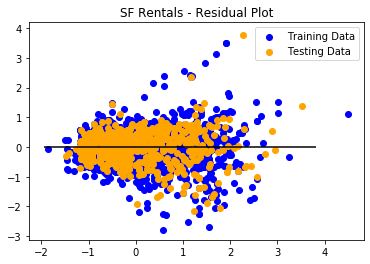

In [14]:
# Fit the Model to the scaled training data and make predictions using the scaled test data

# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("SF Rentals - Residual Plot")
plt.show()

In [21]:
# Quantify your model using the scaled data

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
errors = abs(predictions - y_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE,2)}\nR2: {round(r2, 2)}")

MSE: 10796731.57
R2: 0.72


In [22]:
RMSE = np.sqrt(MSE)
RMSE

3285.838031486653

In [16]:
predictions1 = y_scaler.inverse_transform(predictions)

In [17]:
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions1[0]}")
print(f"Prediction Error: {predictions1[0] - y_test[0]}")

True output: [4200]
Predicted output: [3070.80283609]
Prediction Error: [-1129.19716391]


In [18]:
df = pd.DataFrame({'Predicted': predictions1.ravel(), 'Actual': y_test.ravel(), 'Abs Error': errors.ravel()})
df

,Predicted,Actual,Abs Error
0,3070.802836,4200,0.956961
1,3947.783330,3515,0.366771
2,1744.650235,1550,0.164960
3,2533.136859,2850,0.268532
4,2644.786248,3195,0.466290
...,...,...,...
644,3041.911022,2495,0.463491
645,3850.001953,4995,0.970352
646,2781.627470,2795,0.011333
647,2487.472768,2595,0.091126


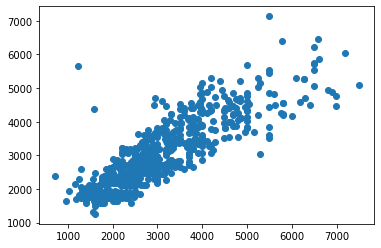

In [19]:
plt.scatter(y_test, predictions1)